# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

### Test İstatistikleri

Ana kitle standart sapması biliniyorsa z istatistiği kullanılır.

Ana kitle standart sapması bilinmiyor ve n>30 ise z istatistiği kullanılır.

Ana kitle standart sapması bilinmiyor ve n<30 ise t istatistiği kullanılır.

### Varsayımlar
Bu testi kullanabilmek için tek bir varsayım var o da incelediğimiz değişkenin normal dağılıma sahip olması gerekmektedir.

### Problem 
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib.pyplot import plot

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

olcumler[1:10]

array([160, 234, 149, 145, 107, 197,  75, 201, 225])

In [5]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [7]:
# Bu ortalama değeri şansa bağlı oluşmuş olabilir mi? İstatiksel olarak anlamlı mı?
# Şans durumunu ortadan kaldırmak için test yapacağız.

## Varsayım incelemeleri

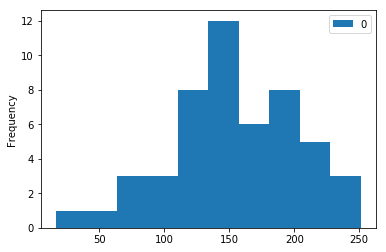

In [9]:
pd.DataFrame(olcumler).plot.hist();

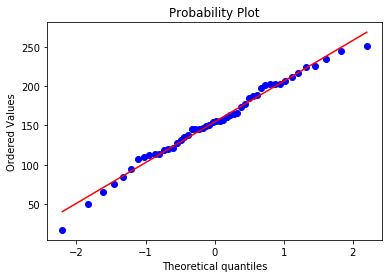

In [10]:
import pylab 
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()

In [11]:
# Teorik değerler ile gerçek değerler arasındaki durumu görebilmek için bu yapı oluşturuldu.

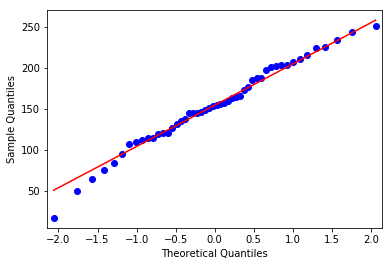

In [12]:
import statsmodels.api as sm
sm.qqplot(olcumler, line = "s") 
pylab.show()

In [13]:
#shapiro-wilks

In [14]:
#Dağılımın normal olup olmadığını test edeceğiz

In [17]:
from scipy.stats import shapiro
shapiro(olcumler)

(0.9853105545043945, 0.7848747968673706)

### T örneklem Testi

In [19]:
stats.ttest_1samp(olcumler, popmean = 170 ) #popmean --> Beklenen değer

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

Hesaplanan pvalue değeri alfa değerinden küçük olduğu için H0 hipotezi reddedilir ve %95 güvenilirlik ile anakitle değeri 170 saniyeden farklıdır.

### T tablo değerinin elde edilmesi

In [21]:
stats.t.ppf(q = 0.025, df = len(olcumler) -1)

-2.0095752344892093

Hesaplanan test istatistiği ve tablo değerleri eksi değerler olduğu için negatif yönlü değerlendiriyoruz.

Hesaplanan test istatistiği, tablo değerinden küçük olduğundan dolayı H0'ı reddediyoruz. 

In [25]:
stats.t.cdf(x = -2.1753117985877966, df = len(olcumler)-1) * 2 #df serbestlik derecesi

# Test istatistiği üzerinden pvalue değerine ulaşmaya çalışıyoruz.

0.034460415195071446

### Tek yönlü hipotez testi değerlendirmesi

p-value/2 < 0.05 ve t > 0

### Güven aralığı hesaplamak

In [27]:
import statsmodels.stats.api as sms
sms.DescrStatsW(olcumler).tconfint_mean()

(139.95008462736266, 168.80991537263733)

# Nonparametrik Tek Örneklem Testi

Yaptığımız shapiro-wilks testinin sonucunun istediğimiz gibi dönmediğini ve tek örneklem t testini parametrik olarak yapamadığımızı düşünelim. Bu durumda nonparametrik tek örneklem testi yapmamız gerekiyor.

In [30]:
from statsmodels.stats.descriptivestats import sign_test

In [33]:
#Dağılımın parametrik olmadığını biliyoruz. Varsayım sağlanmıyor.

In [34]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

In [35]:
#H0 hipotezi reddedilmez. Ortalama 170'den istatiksel olarak anlamlı düzeyde farklı değildir.

In [32]:
?sign_test

Signature: sign_test(samp, mu0=0)
Docstring:
Signs test.

Parameters
----------
samp : array-like
    1d array. The sample for which you want to perform the signs
    test.
mu0 : float
    See Notes for the definition of the sign test. mu0 is 0 by
    default, but it is common to set it to the median.

Returns
---------
M, p-value

Notes
-----
The signs test returns

M = (N(+) - N(-))/2

where N(+) is the number of values above `mu0`, N(-) is the number of
values below.  Values equal to `mu0` are discarded.

The p-value for M is calculated using the binomial distrubution
and can be intrepreted the same as for a t-test. The test-statistic
is distributed Binom(min(N(+), N(-)), n_trials, .5) where n_trials
equals N(+) + N(-).

See Also
---------
scipy.stats.wilcoxon
File:      ~/anaconda3/lib/python3.7/site-packages/statsmodels/stats/descriptivestats.py
Type:      function


# Tek Örneklem Oran Testi

Oransal bir ifade test edilmek istenildiğinde kullanılır.

Problem: dönüşüm oranı test edilmek isteniyor.

HO: p = 0.125 
    
H1: p != 0.125


500 kişi tıklamış 40 tanesi alışveriş yapmış.

Örnek oranı: 0.08

In [37]:
from statsmodels.stats.proportion import proportions_ztest

In [38]:
count = 40 # Gözlemlenen başarı sayısı
nobs = 500 # Gözlem sayısı
value = 0.125 

In [44]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

#pvalue değeri incelendiğinde anakitleye ilişkin oranın 0.125 olduğunu ifade eden H0 hipotezi istatiksel olarak %95 güvenilirlikle reddedilir. Ana kitle değeri 0.125'den faklıdır.

In [45]:
40/500
#Aşağı yönlü bir farklılık var.

0.08

In [41]:
proportions_ztest(count, nobs, value, alternative = "smaller")

(-3.7090151628513017, 0.00010403348449229895)

In [46]:
#H0 reddediliyor.